In [138]:
import pandas as pd
import numpy as np


In [139]:
data = pd.read_csv('./Data/train.csv')

In [140]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [141]:
print(data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [142]:
data['GarageType'].isnull().sum()

81

In [143]:
data["LotFrontage"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1201 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [144]:
# if missing values in columns are more than 30% then drop that column

cols_to_drop = [col for col in data.columns if data[col].isnull().mean() > 0.3]

In [145]:
cols_to_drop

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [146]:
data.drop(cols_to_drop, axis=1, inplace=True)

In [147]:
# columns with missing values
cols_with_missing = [col for col in data.columns if data[col].isnull().any()]

In [148]:
cols_with_missing

['LotFrontage',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [149]:
# columns with non numeric values
non_numeric_cols = [col for col in data.columns if not pd.api.types.is_numeric_dtype(data[col])]
non_numeric_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [150]:
data[cols_with_missing].isnull().sum()

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [151]:
# convert non numeric columns to numeric
for col in non_numeric_cols:
    data[col] = pd.Categorical(data[col]).codes

In [152]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,3,3,0,4,...,0,0,0,0,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,3,3,0,4,...,0,0,0,0,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,3,3,0,4,...,0,0,0,0,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,3,3,0,4,...,112,0,0,0,0,4,2010,8,4,142125


In [153]:
# non-numeric columns in data
columns  = [col for col in data.columns if not pd.api.types.is_numeric_dtype(data[col])]
columns

[]

In [154]:
data[cols_with_missing]

,LotFrontage,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,196.0,2,3,3,2,5,4,1,2003.0,1,4,4
1,80.0,0.0,2,3,1,0,5,4,1,1976.0,1,4,4
2,68.0,162.0,2,3,2,2,5,4,1,2001.0,1,4,4
3,60.0,0.0,3,1,3,0,5,4,5,1998.0,2,4,4
4,84.0,350.0,2,3,0,2,5,4,1,2000.0,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,0.0,2,3,3,5,5,4,1,1999.0,1,4,4
1456,85.0,119.0,2,3,3,0,4,4,1,1978.0,2,4,4
1457,66.0,0.0,3,1,3,2,5,4,1,1941.0,1,4,4
1458,68.0,0.0,3,3,2,2,4,0,1,1950.0,2,4,4


In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

In [156]:
correlation = data.corr()


In [157]:
correlation

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.006096,-0.010601,-0.033226,0.008916,0.032122,-0.019659,0.013324,0.049756,...,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.021917
MSSubClass,0.011156,1.000000,0.035900,-0.386347,-0.139781,-0.024969,0.119289,-0.002940,-0.022844,0.075910,...,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,-0.006096,0.035900,1.000000,-0.111690,-0.034452,0.087654,0.061887,-0.017854,-0.001192,-0.009895,...,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotFrontage,-0.010601,-0.386347,-0.111690,1.000000,0.426095,-0.040886,-0.169641,-0.080757,NaN,-0.208276,...,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,-0.034559,0.063372,0.351799
LotArea,-0.033226,-0.139781,-0.034452,0.426095,1.000000,-0.197131,-0.165315,-0.149083,0.010123,-0.121161,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.021172,-0.013585,-0.031496,0.011200,0.001205,0.003690,-0.033455,-0.011599,-0.051552,0.018902,...,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,-0.047386,0.013320,0.046432
YrSold,0.000712,-0.021407,-0.020628,0.007450,-0.014261,-0.025043,0.036449,0.020507,0.023353,-0.005992,...,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.028923
SaleType,0.019773,0.012464,0.097437,-0.034559,0.012292,0.014339,-0.000911,-0.025754,-0.126770,0.014325,...,-0.016731,-0.009034,0.004533,0.011009,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.054911
SaleCondition,-0.005806,-0.024940,0.009494,0.063372,0.034169,0.006064,-0.038118,0.033809,-0.089701,0.051579,...,-0.098388,0.004379,-0.020095,-0.067251,0.013027,0.013320,0.003880,0.184067,1.000000,0.213092


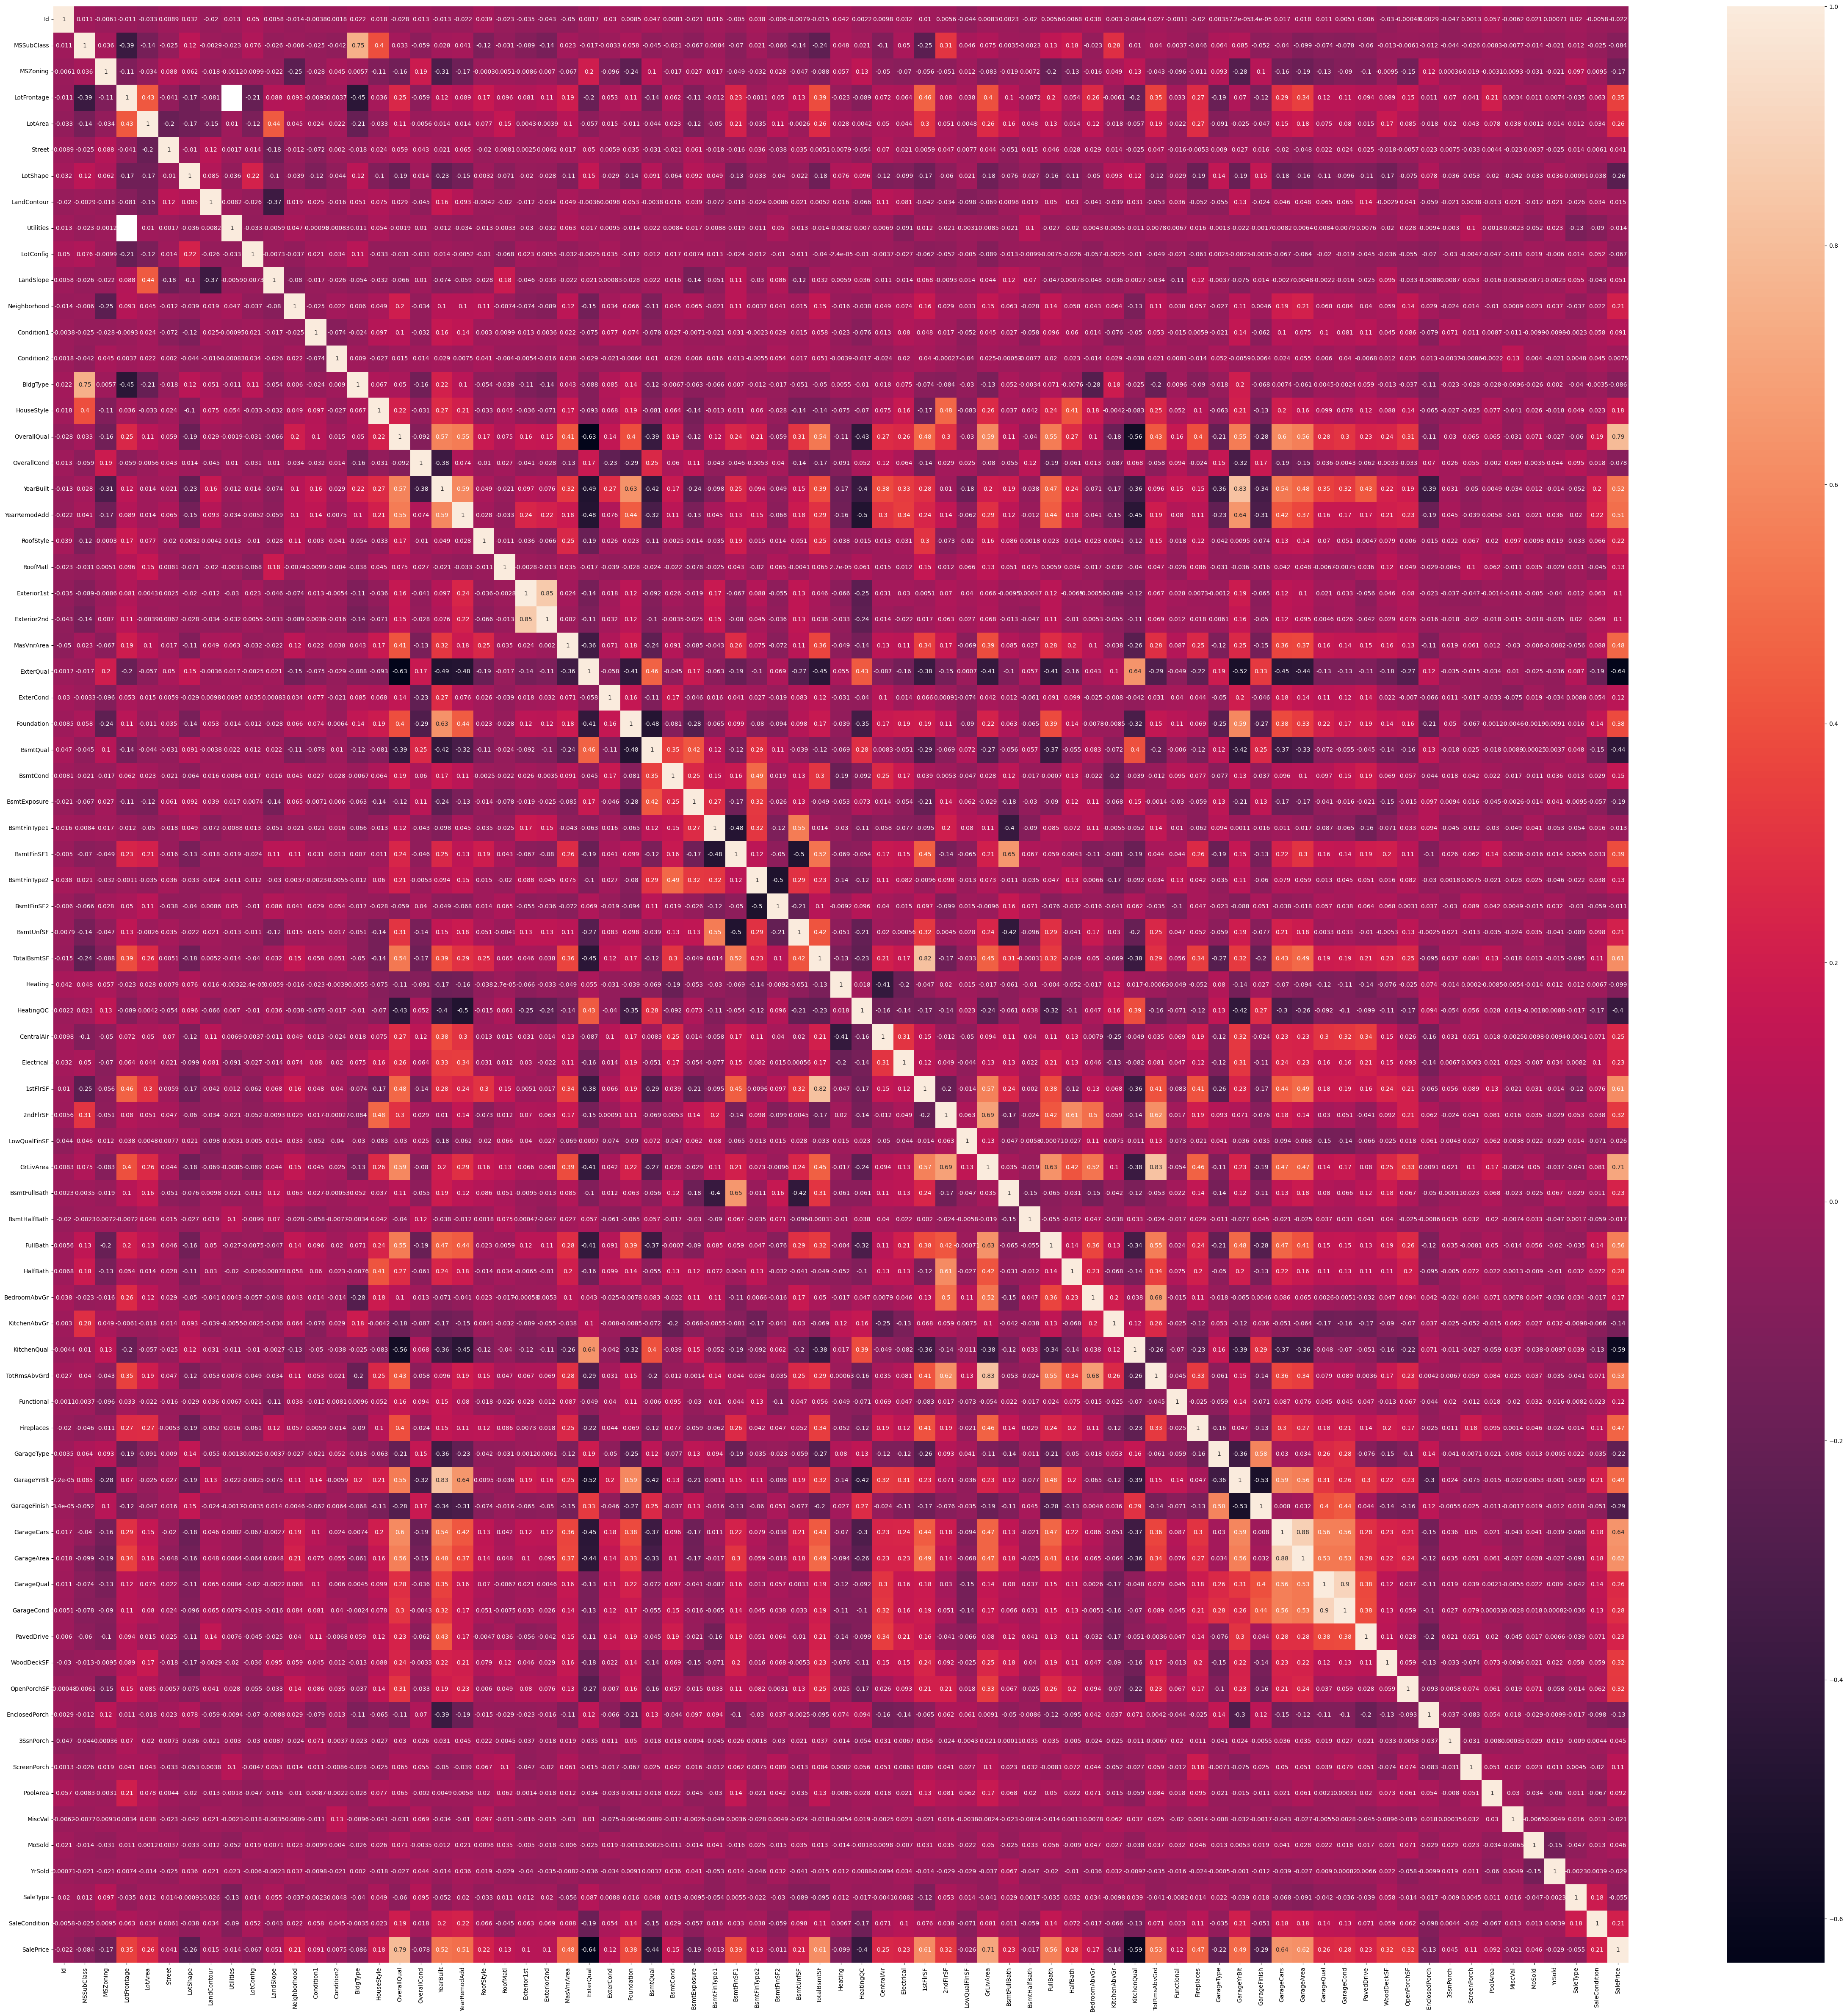

In [158]:
# visualize correlation
plt.figure(figsize=(60,60))
sns.heatmap(correlation, annot=True )
# export image
plt.savefig('correlation.png', dpi=400)

In [159]:
data[cols_with_missing].isnull().sum()

LotFrontage     259
MasVnrArea        8
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinType2      0
Electrical        0
GarageType        0
GarageYrBlt      81
GarageFinish      0
GarageQual        0
GarageCond        0
dtype: int64

In [160]:
# Replace -1 with NaN
data.replace(-1, np.nan, inplace=True)

In [161]:
data[cols_with_missing].isnull().sum()

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [162]:
# columns which has more then 0.2 correlation with LotFrontage
corr_with_Lotfrontage = correlation["LotFrontage"]

corr_with_Lotfrontage = corr_with_Lotfrontage[abs(corr_with_Lotfrontage) > 0.2].index.to_list()
print(corr_with_Lotfrontage)


['MSSubClass', 'LotFrontage', 'LotArea', 'LotConfig', 'BldgType', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'PoolArea', 'SalePrice']


In [163]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score


# Create a new DataFrame containing only the correlated columns and LotFrontage
data_LotFrontage = data[corr_with_Lotfrontage]

# Split the data into features (X) and target (y)
X = data_LotFrontage.dropna().drop('LotFrontage', axis=1)  # Features
y = data_LotFrontage.dropna()['LotFrontage']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost regressor
xgb_LotFrontage = XGBRegressor()

# Train the regressor
xgb_LotFrontage.fit(X_train, y_train)

# Predict LotFrontage for rows with missing values
X_missing = data_LotFrontage[data_LotFrontage['LotFrontage'].isnull()].drop('LotFrontage', axis=1)
imputed_values = xgb_LotFrontage.predict(X_missing)

print(mean_squared_error(y_test, xgb_LotFrontage.predict(X_test)))





214.57655651404843


In [164]:
corr_with_Lotfrontage

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'LotConfig',
 'BldgType',
 'OverallQual',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PoolArea',
 'SalePrice']

In [165]:
# Replace missing values with imputed values in the original DataFrame
data.loc[data['LotFrontage'].isnull(), 'LotFrontage'] = imputed_values

In [166]:
data[cols_with_missing].isnull().sum()

LotFrontage      0
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [167]:
# fill mean value in MasVnrArea

data['MasVnrArea'].fillna(data['MasVnrArea'].mean(), inplace=True)

C:\Users\alisa\AppData\Local\Temp\ipykernel_5912\736476099.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MasVnrArea'].fillna(data['MasVnrArea'].mean(), inplace=True)


In [168]:
data[cols_with_missing].isnull().sum()

LotFrontage      0
MasVnrArea       0
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [128]:
# impute Electrical with mode
data['Electrical'].fillna(data['Electrical'].mode()[0], inplace=True)


C:\Users\alisa\AppData\Local\Temp\ipykernel_5912\2007351053.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Electrical'].fillna(data['Electrical'].mode()[0], inplace=True)


In [129]:
data[cols_with_missing].isnull().sum()

LotFrontage      0
MasVnrArea       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Electrical       0
GarageType      74
GarageYrBlt     74
GarageFinish    74
GarageQual      74
GarageCond      74
dtype: int64

In [130]:
# fill 0 where garage type is none
data['GarageType'].fillna(0, inplace=True)
data['GarageYrBlt'].fillna(0, inplace=True)

# fill 0 where BsmtQual is none
data['BsmtQual'].fillna(0, inplace=True)
data[cols_with_missing].isnull().sum()

GarageType
1.0    860
5.0    369
3.0     87
2.0     19
4.0      7
0.0      6
Name: count, dtype: int64